In [ ]:
# Import standard data and visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# It seems there was an issue recently relating to tensorflow and Keras that broke the Top2Vec import: https://github.com/tensorflow/probability/issues/1795
# We attempt the workaround detailed here: https://github.com/tensorflow/tensorflow/releases/tag/v2.16.1
!pip install tf-keras~=2.16
import os
os.environ["TF_USE_LEGACY_KERAS"]="1"
import tf_keras as keras

# Import the Top2Vec
# This also requires installation on Colaboratory, as it's not pre-installed (😢)
!pip install top2vec[sentence_encoders]
from top2vec import Top2Vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━ 290.5/589.8 MB 3.0 MB/s eta 0:01:40
ERROR: Operation cancelled by user
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 26.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 55.8 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━ 219.2/589.8 MB 6.7 MB/s eta 0:00:56ERROR: Operation cancelled by user
     ━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━ 219.2/589.8 MB 6.7 MB/s eta 0:00:56


ModuleNotFoundError: No module named 'top2vec'

In [ ]:
GTC_V2 = pd.read_csv('https://raw.githubusercontent.com/MiriamSchirmer/genocide-transcript-corpus/main/Dataset_GTC-V2.csv', sep =';')

In [ ]:
documents = list(GTC_V2["text"]) #Convert the text column to a list
model = Top2Vec(documents, embedding_model='universal-sentence-encoder') #Run Top2Vec on the list using the universal sentence encoder

2024-03-16 03:54:58,176 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-03-16 03:55:12,360 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2024-03-16 03:55:41,510 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-03-16 03:56:03,725 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-03-16 03:57:47,934 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-03-16 03:57:55,192 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
model.get_num_topics() #Check the number of topics Top2Vec generated

371

In [ ]:
topic_sizes, topic_nums = model.get_topic_sizes() #Assign topic_sizes and topic_nums from the model
topic_sizes

array([1214, 1151,  943,  844,  790,  755,  753,  690,  669,  649,  643,
        626,  625,  625,  623,  612,  596,  586,  562,  544,  477,  460,
        452,  451,  450,  415,  405,  397,  386,  368,  367,  365,  362,
        357,  352,  346,  319,  319,  313,  302,  297,  294,  288,  288,
        286,  280,  279,  278,  268,  255,  254,  247,  247,  245,  243,
        240,  237,  236,  229,  226,  226,  224,  215,  215,  214,  211,
        209,  208,  207,  206,  203,  203,  202,  198,  195,  193,  176,
        175,  173,  173,  171,  171,  170,  170,  169,  169,  169,  167,
        164,  164,  158,  156,  154,  154,  153,  152,  152,  151,  148,
        147,  145,  145,  144,  142,  140,  139,  138,  137,  136,  134,
        134,  133,  133,  132,  132,  131,  130,  130,  129,  128,  125,
        123,  122,  121,  121,  121,  121,  120,  120,  119,  119,  119,
        117,  115,  115,  114,  114,  112,  111,  109,  108,  107,  107,
        106,  106,  106,  105,  105,  104,  103,  1

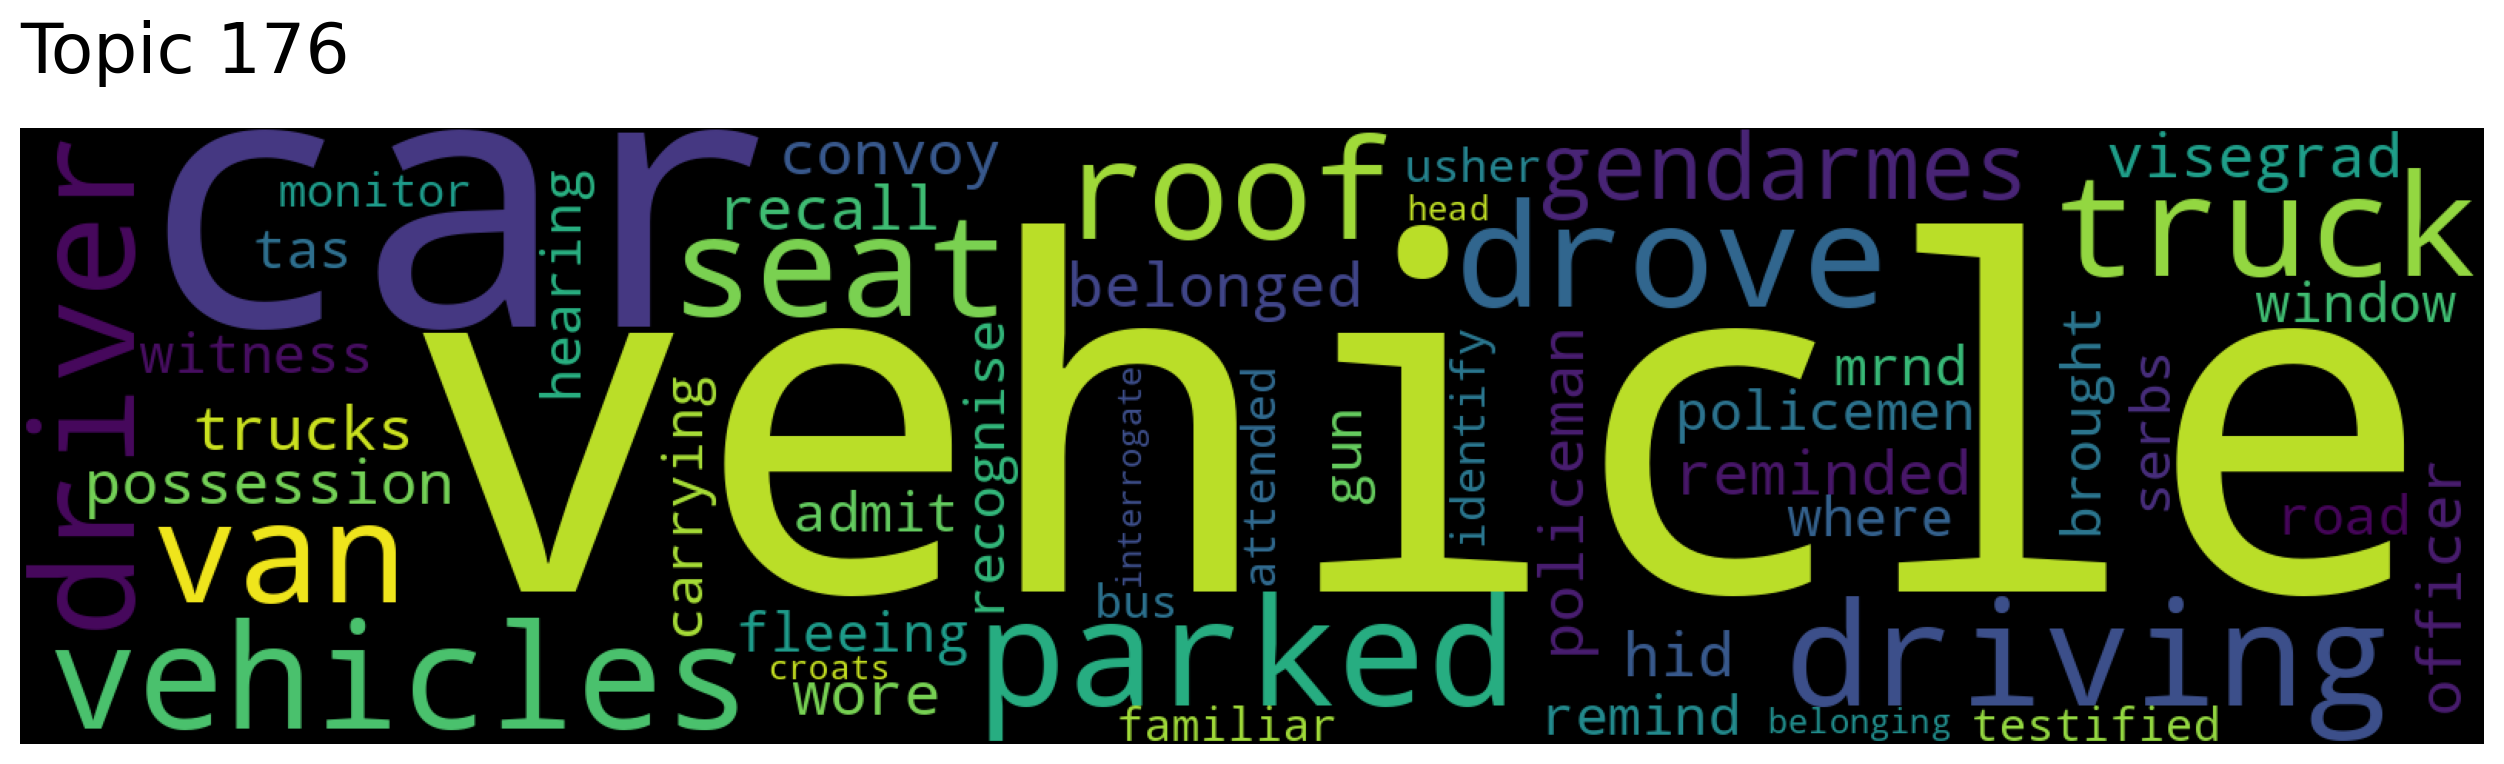

In [ ]:
model.generate_topic_wordcloud(176) #Generate a wordcloud for a general idea of the contents of the model

In [ ]:
topic_words, word_scores, topic_nums = model.get_topics(389)
topic_num=9
pd.DataFrame(topic_words[topic_num], word_scores[topic_num]).head(10) #Check the topic words generated at topic_num

,0
0.597025,yes
0.463561,absolutely
0.416869,sure
0.392660,yeah
0.388528,no
0.373664,correct
0.337090,indeed
0.329485,certainly
0.311633,ya
0.300832,basically


In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["death", "killing"], num_topics=5) #Search for topics with keywords
#death and killing

In [ ]:
topic_words

[array(['tccp', 'karemera', 'choeung', 'lordships', 'sirokaca', 'estmael',
        'gacumbitsi', 'kaing', 'fenz', 'popovic', 'traldi', 'monthe',
        'kurspahic', 'prefet', 'mok', 'kanyarukiga', 'schomburg', 'angk',
        'karegyesa', 'inyenzi', 'chhnang', 'hadn', 'svay', 'rwamakuba',
        'kamuhanda', 'kanyagote', 'guisse', 'nyarubuye', 'khieu', 'savuth',
        'banja', 'koppe', 'kozarac', 'hambarine', 'samphan', 'prak',
        'kamanzi', 'nyange', 'sartorio', 'ieng', 'makwaia', 'seromba',
        'keraterm', 'ngirumpatse', 'susnjari', 'amleang', 'samrin',
        'athanase', 'guek', 'tuzla'], dtype='<U14'),
 array(['tutsi', 'tutsis', 'srebrenica', 'judge', 'hutu', 'serbs',
        'massacres', 'rwandan', 'mladic', 'hutus', 'genocide', 'judgement',
        'karadzic', 'massacre', 'killing', 'judges', 'killed', 'serb',
        'rwanda', 'killings', 'executed', 'kill', 'responsible',
        'prosecutor', 'khmer', 'phnom', 'prosecution', 'bosniaks',
        'detainee', 'leade

In [ ]:
topic_nums

array([341, 176,  23, 313, 365])

In [ ]:
documents

array(['Q. You told us that prisoners were interrogated.  Were all of the prisoners interrogated, do you know, or some of them?',
       'Q. At the PJ prison -- and that you claimed that you were assigned to guard the detainees -- can you give us the approximate number of the detainees who had been detained back then in those rooms?',
       'Q. When the prisoners were walked to be detained, what did you observe?  What were the condition of the prisoners, and how many guards or those people accompanied the prisoners?',
       'Q. During the time that you provided treatment to the prisoners did you see any prisoners who were sick and died in the detention facility?',
       "Q. So therefore, let's start with this.  So you saw him interrogate prisoners outside beyond the fence.  So who was with Duch then? Who else was with Duch aside from the prisoner when the prisoner was being interrogated outside of the prison?",
       'Q. Who was the interrogator you were working with the most often